<a href="https://colab.research.google.com/github/ritxve/X-tra-Telegram/blob/master/TrajectoryTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Important Libraries
import numpy as np
import matplotlib.pyplot as plt
import math

Carrot Chasing Algorithm (Straight Line)

D :  -9.093161373691572e-07 Delta :  50
D :  7.100593895818091e-07 Delta :  50
D :  3.446834113316e-08 Delta :  50
D :  3.1329139429321363e-07 Delta :  50
D :  -3.533692887073553e-07 Delta :  0
D :  -1.8861535132146896e-07 Delta :  10
D :  2.6995099487516716e-07 Delta :  20
D :  2.9163480612759936e-07 Delta :  30
D :  -9.093161373691572e-07 Delta :  50
D :  -9.743448092371306e-07 Delta :  100
D :  0.014019819574725284 Delta :  200


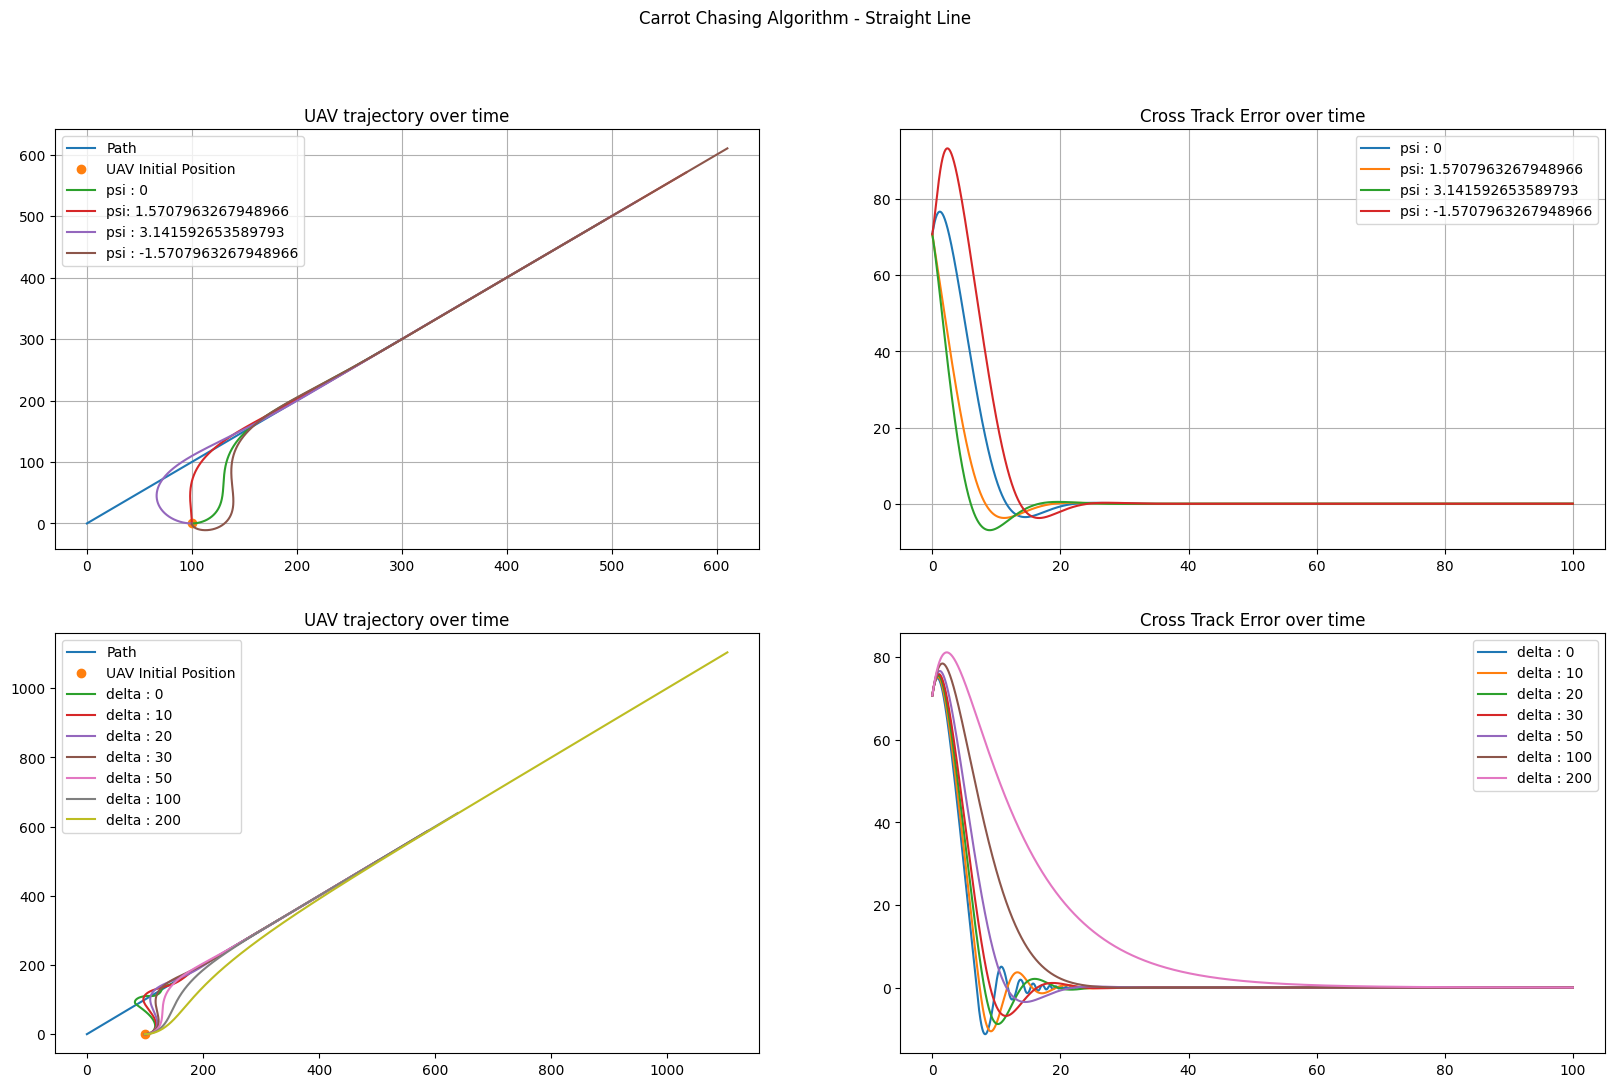

In [2]:
W_1 = [0,0] # Waypoint 1
W_2 = [300,300] # Waypoint 2

p = [100,0] # Initial Positon of UAV


# Initialization of the algorithm variables

delta = 50 # The distance of VTP from projection of p
V = 15 # The velocity of the UAV
K = 0.5 # The proportional gain of the input

# Some Computations

theta = math.atan2((W_2[1] - W_1[1]),(W_2[0] - W_1[0])) # The angle of the line (in radians)
def max_limit(u, vg = V, Rmin = 45):
    if (u > 0 and abs(u) > (vg ** 2)/Rmin):
      return (vg ** 2)/Rmin
    elif(u < 0 and abs(u) > (vg ** 2)/Rmin):
      return -(vg**2)/Rmin
    return u

d_x = W_2[0] - W_1[0]
d_y = W_2[1] - W_1[1]
distance = math.sqrt((d_x**2) + (d_y**2))

time = 100 # Total time of the simulation
dt = 0.01
nt = int(time/dt) # The total number of divisions in the time scale

x = np.zeros(nt + 1)
y = np.zeros(nt + 1)
vx = np.zeros(nt + 1, float)
vy = np.zeros(nt + 1, float)
psi = np.zeros(nt+1)
d = np.ones(nt+1)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))
fig.suptitle('Carrot Chasing Algorithm - Straight Line')


def plot_path(axes, flag : bool = True):
  dx = (W_2[0] - W_1[0])/nt
  X = np.zeros(nt+1)
  X[0] = W_1[0]
  for i in range(nt+1):
    X[i] = X[i-1] + dx
  dy = (W_2[1] - W_1[1])/nt
  Y = np.zeros(nt+1)
  for j in range(nt+1):
    Y[j] = Y[j-1] + dy

  # plt.plot(X, Y, label = 'Path')
  axes.plot(X, Y, label = 'Path')
  # ax[0].legend()
  if(flag):
    axes.plot(p[0], p[1], 'o', label = 'UAV Initial Position')
    axes.legend()


T = np.empty(nt+1)
for i in range(nt+1):
  T[i] = i * dt

# Initial Conditions

def solve(initial_angle : float, Label, axes, delta : float = delta, flag : bool = True):
  psi[0] = initial_angle
  x[0] = p[0]
  y[0] = p[1]
  vx[0] = V * math.cos(psi[0])
  vy[0] = V * math.sin(psi[0])
  for t in range(0,nt):
    Rp_x = x[t] - W_1[0]
    Rp_y = y[t] - W_1[1]
    Rp = math.sqrt((Rp_x ** 2) + (Rp_y ** 2))
    theta_u = math.atan2(y[t] - W_1[1],x[t] - W_1[0])
    beta = theta - theta_u
    R = Rp * math.cos(beta)
    d[t] = Rp * math.sin(beta)
    xt = (R + delta) * math.cos(theta)
    yt = (R + delta) * math.sin(theta)
    # s = [xt,yt]
    psi_d = math.atan2(yt - y[t],xt - x[t])
    u = max_limit(K * (psi_d - psi[t]) * V)
    # Updation of variables
    psi[t+1] = (psi[t] + (K * psi_d * dt))/(1 + K * dt)
    x_ddot = -u * math.sin(psi[t+1])
    y_ddot = u * math.cos(psi[t+1])
    vx[t+1] = V * math.cos(psi[t+1])
    vy[t+1] = V * math.sin(psi[t+1])
    # vx[t+1] = vx[t] + x_ddot * dt
    # vy[t+1] = vy[t] + y_ddot * dt
    x[t+1] = x[t] + vx[t+1] * dt + x_ddot * (dt ** 2)/2
    y[t+1] = y[t] + vy[t+1] * dt + y_ddot * (dt ** 2)/2
    # condition = (abs(x[t]) >= abs(W_2[0])) and (abs(y[t]) >= abs(W_2[1]))
    if((abs(d[t]) < 1e-6 and abs(psi[t] - theta) < 1e-3)):
      x[t+2:] = x[t+1]
      y[t+2:] = y[t+1]
      d[t+1:] = d[t]
      psi[t+1:] = psi[t]
      break
  if(flag):
    axes[0].plot(x, y, label = Label)
    axes[0].legend()
    axes[0].set_title('UAV trajectory over time')
  print('D : ', d[t], 'Delta : ', delta)
  axes[1].plot(T, d, label = Label)
  axes[1].legend()
  axes[1].set_title('Cross Track Error over time')
  return t*dt


plot_path(ax[0][0])
t_1 = solve(0, 'psi : 0', ax[0])
t_2 = solve(math.pi/2, f'psi: {math.pi/2}', ax[0])
t_3 = solve(math.pi, f'psi : {math.pi}', ax[0])
t_4 = solve(-math.pi/2, f'psi : {-math.pi/2}', ax[0])
# print(t_1, t_2, t_3, t_4)
# plt.xlim(W_1[0], W_2[0])
# plt.ylim(W_1[1], W_2[1])
ax[0][0].grid()
# ax[0].show()

plot_path(ax[1][0])
t = solve(0, f'delta : {0}', ax[1], 0)# Orthogonal

t_1 = solve(0, f'delta : {10}', ax[1], 10)
t_2 = solve(0, f'delta : {20}', ax[1], 20)
t_3 = solve(0, f'delta : {30}', ax[1], 30)
t_4 = solve(0, f'delta : {50}', ax[1], 50,)
t_5 = solve(0, f'delta : {100}', ax[1], 100)
t_6 = solve(0, f'delta : {200}', ax[1], 200 )

# plt.xlim(W_1[0], W_2[0])
# plt.ylim(W_1[1], W_2[1])
ax[0][1].grid()
# print(t, t_1, t_2, t_3, t_4, t_5, t_6)


Carrot Chasing Algorithm (Loiter)

D :  -0.47400465355255506 Lamda :  0.1
D :  -0.47400465355255506 Lamda :  0.1
D :  -0.47400465355255506 Lamda :  0.1
D :  -0.47400465355255506 Lamda :  0.1
49.99 49.99 49.99 49.99


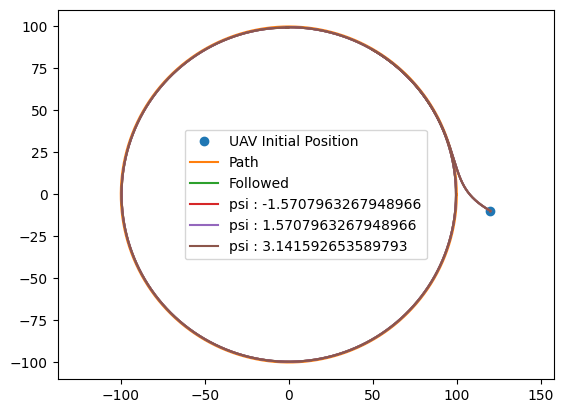

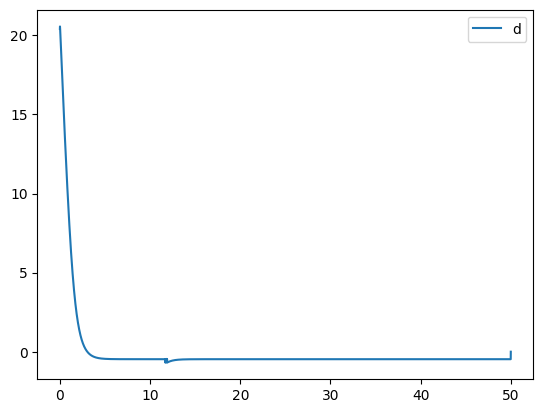

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Initialization
O = [0,0] # The center of the circle to be followed
r = 100 # The radius of the circle to be followed
p = [120, -10] # Outside the circle Initial Position
initial_psi = 0
lamda = 0.1
V = 15
K = 20

# Simulation
dt = 0.01
T = 50

nt = int(T/dt)
x = np.zeros(nt+1)
y = np.zeros(nt+1)
d = np.zeros(nt+1)
psi = np.zeros(nt+1)
vx = np.zeros(nt+1)
vy = np.zeros(nt+1)

def max_limit(u, vg = V, Rmin = 45):
    if (u > 0 and abs(u) > (vg ** 2)/Rmin):
      return (vg ** 2)/Rmin
    elif(u < 0 and abs(u) > (vg ** 2)/Rmin):
      return -(vg**2)/Rmin
    return u

X = np.empty(nt+1)
Y = np.empty(nt+1)

def plot_path():
  plt.plot(p[0], p[1],'o', label = 'UAV Initial Position')
  d_phi = ((2 * math.pi)/T) * dt
  phi = 0
  for t in range(0, nt+1):
    X[t] = O[0] + r * math.cos(phi)
    Y[t] = O[1] + r * math.sin(phi)
    phi = phi + d_phi
  plt.plot(X, Y, label = 'Path')
  plt.legend()
  plt.axis('equal')
  # plt.xlim(-20, 20)
  # plt.ylim(-20, 20)

theta_lamda = np.empty(nt+1)
def solve(initial_angle : float, Label, lamda : float = lamda, flag : bool = True):
  # Initialization of arrays
  x[0] = p[0]
  y[0] = p[1]
  psi[0] = initial_psi
  vx[0] = V * math.cos(psi[0])
  vy[0] = V * math.sin(psi[0])
  for t in range(0, nt):
    d_xcomponent  = O[0] - x[t]
    d_ycomponent = O[1] - y[t]
    d[t] = math.sqrt((d_xcomponent ** 2) + (d_ycomponent ** 2)) - r # Calculate Error Offset
    theta = math.atan2(y[t] - O[1], x[t] - O[0])  # Calulate angle from Center
    xt = O[0] + r * math.cos(theta + lamda) # New coordinates
    yt = O[1] + r * math.sin(theta + lamda) # New coordinates
    theta_lamda[t] = theta + lamda
    # s = [xt, yt] --> VTP
    psi_d = math.atan2(yt - y[t], xt - x[t])
    u = max_limit(K * (psi_d - psi[t]) * V)
    # print(f'theta : {theta}')

    # Solving equns of motion
    psi[t+1] = (psi[t] + K * psi_d * V * dt)/(1 + K  * V * dt)
    # plt.plot(xt, yt, 'x')
    x_ddot = -u * math.sin(psi[t+1])
    y_ddot = u * math.cos(psi[t+1])
    vx[t+1] = V * math.cos(psi[t+1])
    vy[t+1] = V * math.sin(psi[t+1])
    x[t+1] = x[t] + vx[t] * dt + x_ddot * (dt ** 2)/2
    y[t+1] = y[t] + vy[t] * dt + y_ddot * (dt ** 2)/2
    if(abs(d[t]) < 1e-6):
      x[t+2:] = x[t+1]
      y[t+2:] = y[t+1]
      d[t+1:] = d[t]
      psi[t+2:] = psi[t]
  if(flag):
    plt.plot(x, y, label = Label)
    plt.legend()
  print('D : ', d[t], 'Lamda : ', lamda)

  return t*dt


time = np.empty(nt+1)
for i in range(nt+1):
  time[i] = i * dt

plot_path()
t = solve(initial_psi, "Followed")
t_1 = solve(-math.pi/2, f'psi : {-math.pi/2}')
t_2 = solve(math.pi/2, f'psi : {math.pi/2}')
t_3 = solve(math.pi, f'psi : {math.pi}')

print(t, t_1, t_2, t_3)
# plt.plot(x[-1], y[-1], 'x', label = "Final Point")
# plt.legend()
plt.show()
plt.plot(time, d, label = 'd')
plt.legend()

LQR Straight Line Path Following

20.36 19.13 49.99


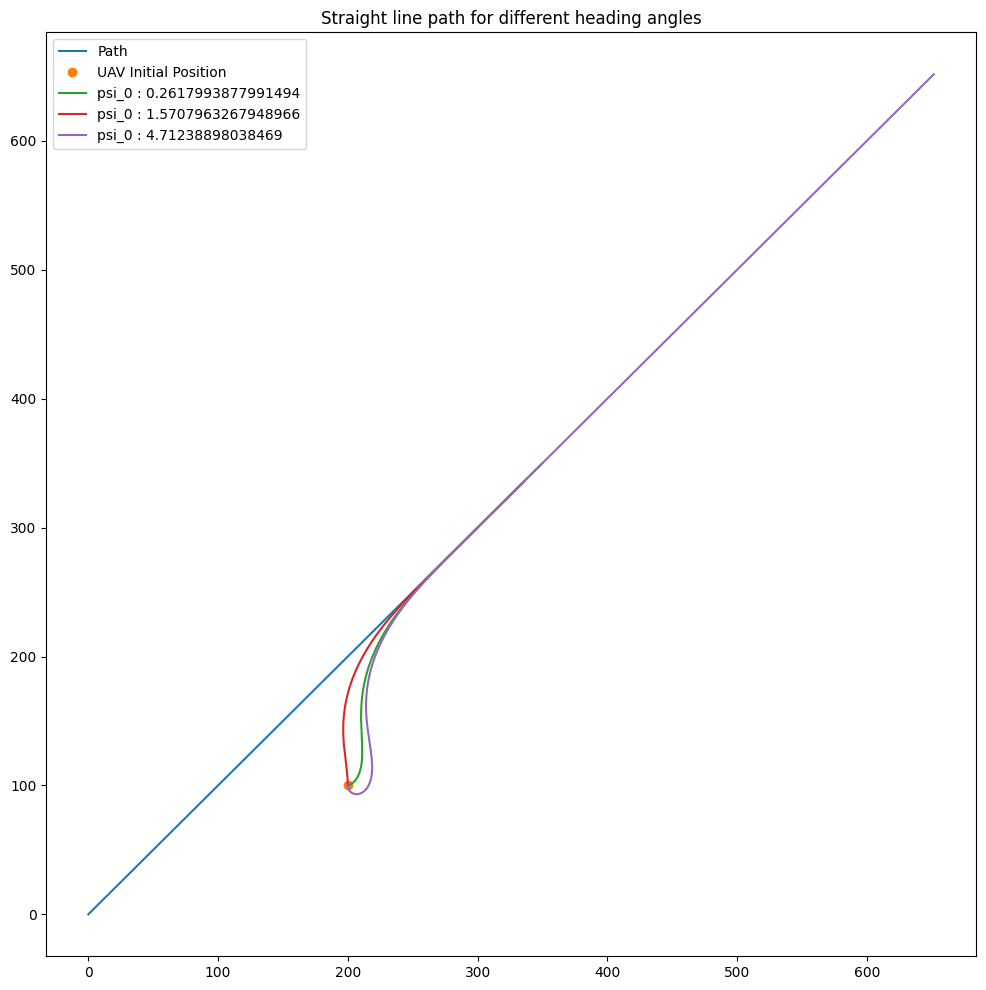

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np


W_1 = [0,0] #Waypoint 1
W_2 = [300,300] # Waypoint 2
p = [200,100] # Initial Position of UAV

V = 15
psi_p = math.atan2(W_2[1] - W_1[1], W_2[0] - W_1[0])

dt = 0.01
T = 50

nt = int(T/dt)

x = np.zeros(nt+1) # Position of UAV (x,y)
y = np.zeros(nt+1)
psi = np.zeros(nt+1)
vx = np.zeros(nt+1)
vy = np.zeros(nt+1)
d = np.zeros(nt+1)

def plot_path(flag : bool = True):
  dx = (W_2[0] - W_1[0])/nt
  X = np.zeros(nt+1)
  X[0] = W_1[0]
  for i in range(nt+1):
    X[i] = X[i-1] + dx
  dy = (W_2[1] - W_1[1])/nt
  Y = np.zeros(nt+1)
  for j in range(nt+1):
    Y[j] = Y[j-1] + dy

  plt.plot(X, Y, label = 'Path')
  # axes.plot(X, Y, label = 'Path')
  plt.legend()
  if(flag):
    plt.plot(p[0], p[1], 'o', label = 'UAV Initial Position')
    plt.legend()

def solve(psi_0, Label):
  x[0] = p[0] # x -> array of x coordinates, p -> Inital Location of UAV
  y[0] = p[1] # Y -> array of y coordinates
  psi[0] = psi_0
  vx[0] = V * math.cos(psi[0])
  vy[0] = V * math.sin(psi[0])
  d_b = 4

  for t in range(0, nt):

    # Computation of LQR variables
    theta = math.atan2(y[t] - W_1[1], x[t] - W_1[0])
    beta = theta - psi_p
    R_x = x[t] - W_1[0]
    R_y = y[t] - W_1[1]
    R = math.sqrt((R_x ** 2) + (R_y ** 2))
    d[t] = R * math.sin(beta)
    q1 = math.sqrt(abs(d_b/(d_b - d[t])))
    q2 = math.sqrt(2*q1 + 1)
    vd = V * math.sin(psi[t] - psi_p)
    u = -(q1 * d[t] + q2 * vd) # Lateral Input acceleration


    # Numerical Integeration of Equations of Motion
    psi[t+1] = psi[t] + (u/V) * dt

    x_ddot = -u * math.sin(psi[t+1])
    y_ddot = u * math.cos(psi[t+1])

    vx[t+1] = V * math.cos(psi[t+1])
    vy[t+1] = V * math.sin(psi[t+1])

    x[t+1] = x[t] + vx[t] * dt + x_ddot * (dt ** 2)/2
    y[t+1] = y[t] + vy[t] * dt + y_ddot * (dt ** 2)/2 # Taylor's Method order 2. y(x+h) = y(x) + y'(x) dx + y"(x) (dx^2)/2

    if(abs(d[t]) < 1e-6 and abs(psi[t] - psi_p) < 1e-3):
      x[t+2:] = x[t+1]
      y[t+2:] = y[t+1]
      vx[t+2:] = vx[t+1]
      vy[t+2:] = vy[t+1]
      psi[t+2:] = psi[t+1]
      d[t+1:] = d[t]
      break
  plt.plot(x, y, label = Label)
  plt.legend()
  return t * dt


plt.figure(figsize = (12,12))
plot_path()
t1 = solve(math.pi/12, f"psi_0 : {math.pi/12}")
t2 = solve(math.pi/2, f"psi_0 : {math.pi/2}")
t3 = solve(3 * math.pi/2, f"psi_0 : {3 * math.pi/2}")
plt.title('Straight line path for different heading angles')

print(t1, t2, t3)





Loiter Path Following LQR

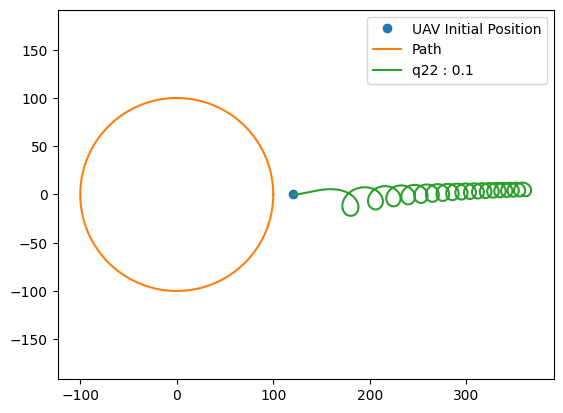

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

O = [0,0] # The center of the circle
r = 100 # The radius of the circle
p = [120,0] # Initial Position of UAV
q22 = 0.1
V = 15

# Simulation
dt = 0.01
T = 70
nt = int(T/dt)

x = np.zeros(nt+1)
y = np.zeros(nt+1)
psi = np.zeros(nt+1)
d = np.zeros(nt+1)
vx = np.zeros(nt+1)
vy = np.zeros(nt+1)

def max_limit(u, vg = V, Rmin = 45):
    if (u > 0 and abs(u) > (vg ** 2)/Rmin):
      return (vg ** 2)/Rmin
    elif(u < 0 and abs(u) > (vg ** 2)/Rmin):
      return -(vg**2)/Rmin
    return u

X = np.empty(nt+1)
Y = np.empty(nt+1)

def plot_path():
  plt.plot(p[0], p[1],'o', label = 'UAV Initial Position')
  d_phi = ((2 * math.pi)/T) * dt
  phi = 0
  for t in range(0, nt+1):
    X[t] = O[0] + r * math.cos(phi)
    Y[t] = O[1] + r * math.sin(phi)
    phi = phi + d_phi
  plt.plot(X, Y, label = 'Path')
  plt.legend()
  plt.axis('equal')
  # plt.xlim(-20, 20)
  # plt.ylim(-20, 20)

d_b = 4

def solve(q22 : float, initial_angle : float):
  x[0] = p[0]
  y[0] = p[1]
  psi[0] = initial_angle
  vx[0] = V * math.cos(psi[0])
  vy[0] = V * math.sin(psi[0])
  for t in range(0, nt):
    theta = math.atan2(x[t] - O[0], y[t] - O[1])
    R_x = x[t] - O[0]
    R_y = y[t] - O[1]
    d[t] = math.sqrt((R_x ** 2) + (R_y ** 2)) - r
    q1 = math.sqrt(abs(d_b/(d_b - d[t])))
    q2 = math.sqrt(2*q1 + q22)
    vd = V * math.sin(psi[t] - theta)
    u = -(q1 * d[t] + q2 * vd) # Lateral Input acceleration


  # Numerical Integeration of Equations of Motion
    psi[t+1] = psi[t] + (u/V) * dt

    x_ddot = -u * math.sin(psi[t+1])
    y_ddot = u * math.cos(psi[t+1])

    vx[t+1] = V * math.cos(psi[t+1])
    vy[t+1] = V * math.sin(psi[t+1])

    x[t+1] = x[t] + vx[t] * dt + x_ddot * (dt ** 2)/2
    y[t+1] = y[t] + vy[t] * dt + y_ddot * (dt ** 2)/2 # Taylor's Method order 2. y(x+h) = y(x) + y'(x) dx + y"(x) (dx^2)/2



    if(abs(d[t]) < 1e-6):
      x[t+2:] = x[t+1]
      y[t+2:] = y[t+1]
      vx[t+2:] = vx[t+1]
      vy[t+2:] = vy[t+1]
      psi[t+2:] = psi[t+1]
      d[t+1:] = d[t]
      break
  plt.plot(x, y, label = f'q22 : {q22}')
  plt.legend()
  return t * dt

plot_path()
t1 = solve(0.1, 0)
# t2 = solve(0.5, math.pi/12)
# t3 = solve()


Effect of High winds on Straight path following UAV using AOGL

Text(0.5, 1.0, 'Straight line path for different heading angles in presence of High speed winds')

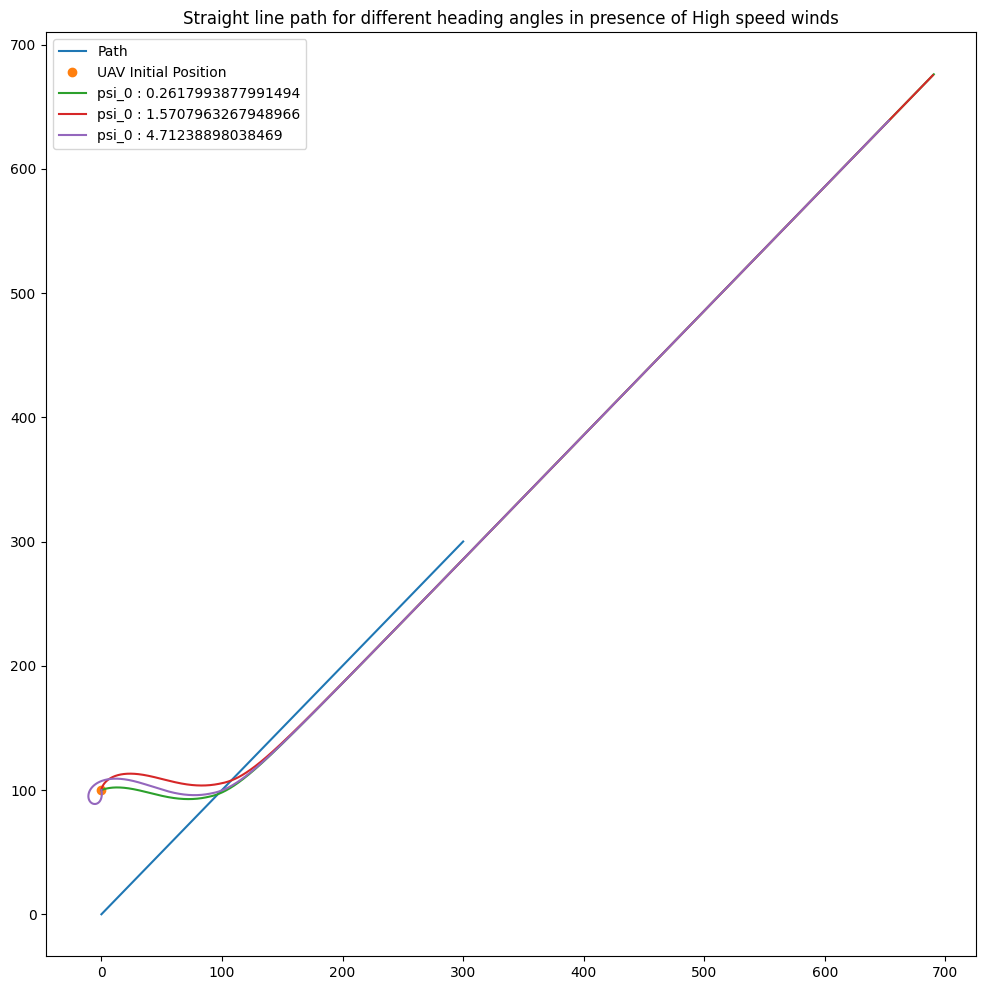

In [6]:
import matplotlib.pyplot as plt
import math
import numpy as np

# INITIALISATION

W_1 = [0,0] #Waypoint 1
W_2 = [300,300] # Waypoint 2
# p = W_1
p = [0,100] # Initial Position of UAV

V = 15
V_w = 0.25 * V
psi_p = math.atan2(W_2[1] - W_1[1], W_2[0] - W_1[0])
psi_w = math.pi * 0.5 + psi_p

dt = 0.01
T = 50

nt = int(T/dt)

x = np.zeros(nt+1) # Position of UAV (x,y)
y = np.zeros(nt+1)
psi = np.zeros(nt+1)
vx = np.zeros(nt+1)
vy = np.zeros(nt+1)
d = np.zeros(nt+1)

# COORDINATES OF ACTUAL PATH

def plot_path(flag : bool = True):
  dx = (W_2[0] - W_1[0])/nt
  X = np.zeros(nt+1)
  dy = (W_2[1] - W_1[1])/nt
  Y = np.zeros(nt+1)
  X[0] = W_1[0]
  for i in range(nt+1):
    X[i] = X[i-1] + dx
    Y[i] = Y[i-1] + dy

# PLOTTING THE ACTUAL PATH

  plt.plot(X, Y, label = 'Path')
  # axes.plot(X, Y, label = 'Path')
  plt.legend()
  if(flag):
    plt.plot(p[0], p[1], 'o', label = 'UAV Initial Position')
    plt.legend()

# INITIALISING VELOCITY AND POSITION OF UAV

def solve(psi_0, Label):
  x[0] = p[0] # x -> array of x coordinates, p -> Inital Location of UAV
  y[0] = p[1] # Y -> array of y coordinates
  psi[0] = psi_0
  vx[0] = V * math.cos(psi[0]) - V_w*math.cos(psi_w)
  vy[0] = V * math.sin(psi[0]) + V_w*math.sin(psi_w)
  d_b = 4

# ITERATING THE POSITION AND VELOCITY

  for t in range(0, nt):

    # Computation of LQR variables
    theta = math.atan2(y[t] - W_1[1], x[t] - W_1[0])
    beta = theta - psi_p
    R_x = x[t] - W_1[0]
    R_y = y[t] - W_1[1]
    R = math.sqrt((R_x ** 2) + (R_y ** 2))
    d[t] = R * math.sin(beta)
    q1 = math.sqrt(abs(d_b/(d_b - d[t])))
    q2 = math.sqrt(2*q1 + 1)
    vd = V * math.sin(psi[t] - psi_p) + V_w*math.sin(psi_w-psi_p)
    u = -(q1 * d[t] + q2 * vd) # Lateral Input acceleration


    # Numerical Integeration of Equations of Motion
    psi[t+1] = psi[t] + (u/V) * dt

    x_ddot = -u * math.sin(psi[t+1])
    y_ddot = u * math.cos(psi[t+1])

    vx[t+1] = V * math.cos(psi[t+1]) - V_w*math.cos(psi_w)
    vy[t+1] = V * math.sin(psi[t+1]) + V_w*math.sin(psi_w)

    x[t+1] = x[t] + vx[t] * dt + x_ddot * (dt ** 2)/2
    y[t+1] = y[t] + vy[t] * dt + y_ddot * (dt ** 2)/2 # Taylor's Method order 2. y(x+h) = y(x) + y'(x) dx + y"(x) (dx^2)/2

    if(abs(d[t]) < 1e-6 and abs(psi[t] - psi_p) < 1e-3):
      # x[t+2:] = x[t+1]
      # y[t+2:] = y[t+1]
      # vx[t+2:] = vx[t+1]
      # vy[t+2:] = vy[t+1]
      # psi[t+2:] = psi[t+1]
      # d[t+1:] = d[t]
      break
  plt.plot(x, y, label = Label)
  plt.legend()
  return t * dt


plt.figure(figsize = (12,12))
plot_path()
t1 = solve(math.pi/12, f"psi_0 : {math.pi/12}")
t2 = solve(math.pi/2, f"psi_0 : {math.pi/2}")
t3 = solve(3 * math.pi/2, f"psi_0 : {3 * math.pi/2}")
plt.title('Straight line path for different heading angles in presence of High speed winds')

# print(t1, t2, t3)
# print(d)



